In [86]:
from modules.metropolis import *
import numpy as np
import matplotlib.pyplot as plt

@dataclass
class SimpleProblem(QFTProblem):
    size: float = 10

    def volume(self) -> npt.NDArray:
        return np.array([10, 100]).reshape((1, 2))

    def get_amplitude(self, x_n: npt.NDArray) -> float:
        profile = np.prod(np.sin(x_n[:, 0]) * np.sin(x_n[:, 1] / 20))

        return profile * np.exp(-x_n.shape[0] / 10) / np.power(np.prod(self.volume()), x_n.shape[0] / 2)

In [87]:
test_problem = SimpleProblem()

metropolis = FockSpaceMetropolis(test_problem, rng=np.random.default_rng())

x_n = metropolis.new_configuration(5)
print("initial\n", x_n)

x_add = metropolis.add_new(x_n)
print("add new\n", x_add)

x_remove = metropolis.remove_one(x_n)
print("remove one\n", x_remove)
            
x_changed = metropolis.change_positions(x_n)
print("change position\n", x_changed)

x_changed = metropolis.change_positions(x_n)
print("change position\n", x_changed)

x_n = metropolis.new_configuration(0)
print("initial\n", x_n)

x_remove = metropolis.remove_one(x_n)
print("remove one\n", x_remove)

x_add = metropolis.add_new(x_n)
print("add new\n", x_add)

initial
 [[ 9.47967785 77.01517892]
 [ 0.27315618 60.85774405]
 [ 9.61816238 71.97700416]
 [ 8.83115635 42.61042507]
 [ 2.3791738  91.31110718]]
add new
 [[ 9.47967785 77.01517892]
 [ 0.27315618 60.85774405]
 [ 9.61816238 71.97700416]
 [ 8.83115635 42.61042507]
 [ 2.3791738  91.31110718]
 [ 6.98006634 48.84856596]]
remove one
 [[ 9.47967785 77.01517892]
 [ 0.27315618 60.85774405]
 [ 9.61816238 71.97700416]
 [ 2.3791738  91.31110718]]
change position
 [[ 4.84355929 54.93953938]
 [ 4.62700293 27.09092303]
 [ 1.30892132 40.06417624]
 [ 1.66058089 70.90049944]
 [ 0.51108978 67.02011228]]
change position
 [[ 3.81348189 87.78341516]
 [ 4.9039957  96.06785802]
 [ 0.85404624 88.13039552]
 [ 5.82426647 60.46326655]
 [ 4.89719165 56.59206523]]
initial
 []
remove one
 None
add new
 [[ 5.48830144 52.02547322]]


In [95]:
x_recent = metropolis.new_configuration(5)
configurations = [x_recent]
for _ in range(10000):
    result = metropolis.step(x_recent)
    if result is None:
        continue

    x_recent = result
    configurations.append(x_recent)

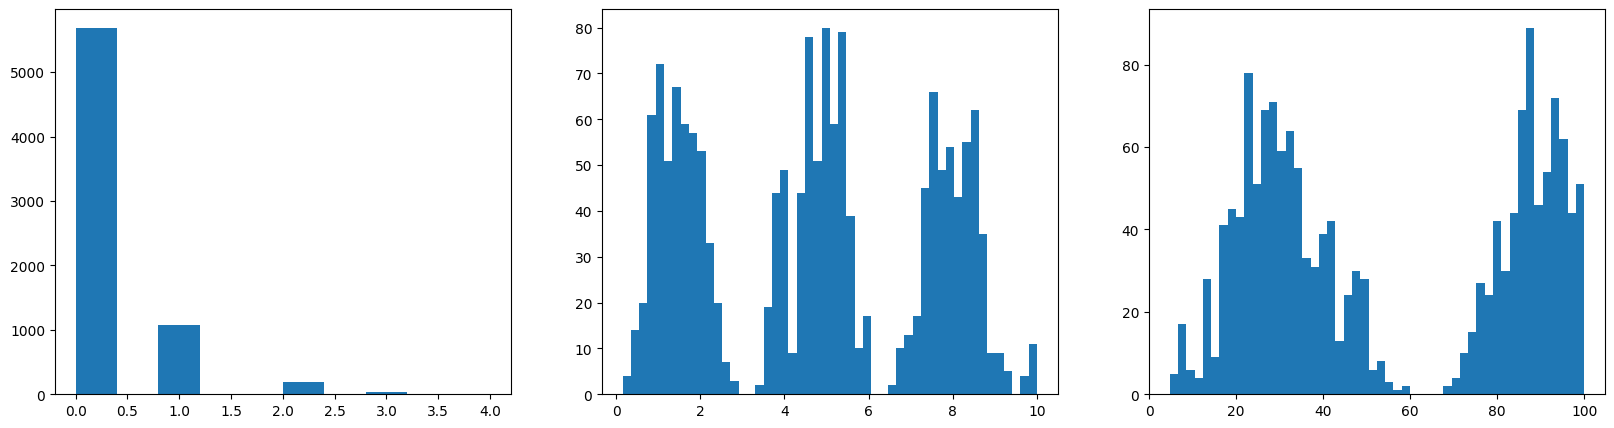

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

skip = int(0.3 * len(configurations))

configurations = configurations[skip:]

n_values = list(map(lambda x: x.shape[0], configurations))
axes[0].hist(n_values) # type: ignore

positions_1 = np.concatenate(list(map(lambda x: x[:, 0], configurations))).ravel()
positions_2 = np.concatenate(list(map(lambda x: x[:, 1], configurations))).ravel()

axes[1].hist(positions_1, bins=50) # type: ignore
axes[2].hist(positions_2, bins=50); # type: ignore